<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/MDR_FULLDATASET_submitted_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the data
from google.colab import files
uploaded = files.upload()
np.random.seed(0)


Saving MUST_MDR_DATA_final_MERGED.csv to MUST_MDR_DATA_final_MERGED (1).csv


In [107]:
data = pd.read_csv("MUST_MDR_DATA_final_MERGED.csv", encoding='latin-1',low_memory=False)
#data = pd.read_csv("MUST_MDR_DATA_final.csv", encoding='latin-1',low_memory=False)
data.head()

,Identification number,Specimen number,Organism,Country,Laboratory,Origin,Last name,First name,Sex,Date of Birth,...,DOX_ND30,LNZ_ND30,MEM_ND10,MET_ND5,PIP_ND100,CCV_ND30,NOV_ND5,FOX_ND10,PEF_ND10,NOR_ND5
0,O-0179,NaN,NaN,UGA,DMM,h,KABIKIIRA,FLORENCE,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O-0180,NaN,NaN,UGA,DMM,h,TUMUHIMBISE,DEUS,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O-0181,NaN,NaN,UGA,DMM,h,KYAHANGIRWE,BETETH,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O-0182,NaN,NaN,UGA,DMM,h,LUBEGA,SAMUEL,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,O-0170,NaN,NaN,UGA,DMM,h,NAKUNDA,ANNITAH,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
print(data.columns)

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth', 'Age', 'Age category', 'Location', 'Institution',
       'Department', 'Location type', 'Date of admission', 'Specimen date',
       'Specimen type', 'Specimen type (Numeric)', 'Reason', 'Isolate number',
       'Organism type', 'Serotype', 'Date of data entry',
       'Hospitalised for more than 48hrs at specimen collection time',
       'Patient transferred from another facility?',
       'Prior antibiotic therapy', 'AMX_ND25', 'AMC_ND20', 'AMK_ND30',
       'AMP_ND10', 'AZM_ND15', 'FEP_ND30', 'BAC_ND10', 'CRO_ND30', 'CXM_ND30',
       'CIP_ND5', 'OXA_ND1', 'CHL_ND30', 'CZO_ND30', 'CLI_ND2', 'GEN_ND10',
       'GEH_ND120', 'ERY_ND15', 'TCY_ND30', 'RIF_ND5', 'SAM_ND10', 'OFX_ND5',
       'SXT_ND12', 'TOB_ND10', 'OPT_ND5', 'MFX_ND5', 'VAN_ND30', 'PEN_ND10',
       'NAL_ND30', 'IPM_ND10', 'CAC_ND30', 'LVX_ND5', 'NIT_ND300', 'C

In [109]:
print(data['Organism'].unique())

[nan 'spn' 'xxx' 'eco' 'kl-' 'sau' 'mor' 'pr-' 'ps-' 'en-' 'sgc' 'can'
 'ent' 'str' 'sal' 'ci-' 'ac-' 'eae' 'con' 'sta' 'sat' 'kpn' 'cdi' 'spy'
 'eag' 'afs' 'pae' 'xsg' 'xpa' 'scn' 'esc' 'cal' 'efa' 'gm-' 'pmi' 'fun'
 'shi' 'prv' 'cfr' 'afl' 'pen' 'kox' 'yea' 'aba' 'acr' 'ngo' 'ani' 'mmo'
 'tn' 'nas' 'ecl' 'gnr' 'sc+' 'kl' 'sgm' 'koz' '157' 'nfr' 'cne' 'cdp'
 'nor' 'bsa' 'pvu' 'bsl' 'ne-' 'hhe' 'sma' 'oth' 'xx' 'afb' 'sai' 'caj'
 'cmv' 'asp' 'cry' 'ha-' 'XXX' 'cdt' 'sep' 'bl' 'ssa' 'xsa' 'svi' 'aan'
 'pma' 'xgo' 'cac' 'cwe' 'spl' 'ecx' 'sfi' 'kas' 'cpa' 'cgu' 'alw' 'cle'
 'efm' 'cci' 'ecc']


In [111]:
import pandas as pd

# Replacement dictionary for organism abbreviations
organism_replacements = {
    'nfr': 'Neisseria meningitidis',
    'spn': 'Streptococcus species', #pneumoniae'
    'eco': 'Escherichia coli',
    'kl-': 'Klebsiella species',
    'sau': 'Staphylococcus aureus',
    'mor': 'Moraxella catarrhalis',
    'pr-': 'Providencia species',
    'ps-': 'Pseudomonas species',
    'en-': 'Enterobacter species',
    'sgc': 'Serratia species',
    'can': 'Candida species',
    'ent': 'Enterococcus species',
    'str': 'Streptococcus species',
    'sal': 'Salmonella species',
    'ci-': 'Citrobacter species',
    'ac-': 'Acinetobacter species',
    'eae': 'Escherichia coli',#Enteroaggregative Escherichia coli
    'con': 'Clostridium species',
    'sta': 'Staphylococcus aureus',
    'sat': 'Sarcina species',
    'kpn': 'Klebsiella species',#Klebsiella pneumoniae
    'cdi': 'Clostridium difficile',
    'spy': 'Streptococcus species',#pyogenes
    'eag': 'Escherichia coli',#(enteropathogenic)
    'afs': 'Aspergillus species',
    'pae': 'Pseudomonas species',#aeruginosa
    'xsg': 'Xanthomonas species',
    'xpa': 'Xanthomonas phaseoli',
    'scn': 'Streptococcus species',#Streptococcus mitis
    'esc': 'Escherichia coli',#(enterotoxigenic)
    'cal': 'Candida species',#albicans',
    'efa': 'Enterococcus species',#faecalis',
    'gm-': 'Gram-negative bacteria',
    'pmi': 'Pseudomonas species',#mallei',
    'fun': 'Fungal species',
    'shi': 'Shigella species',
    'prv': 'Providencia species',#vulgaris',
    'cfr': 'Corynebacterium species',
    'afl': 'Aspergillus flavus',
    'pen': 'Penicillium species',
    'kox': 'Klebsiella species', #Klebsiella oxytoca
    'yea': 'Yeast',
    'aba': 'Acinetobacter species',#Acinetobacter baumannii
    'acr': 'Acinetobacter species',
    'ngo': 'Neisseria gonorrhoeae',
    'ani': 'Anisakis species',
    'mmo': 'Mycobacterium marinum',
    'tn': 'Treponema species',
    'nas': 'Nasal flora',
    'ecl': 'Escherichia coli',#(enterohemorrhagic)
    'gnr': 'Gram-negative rods',
    'sc+': 'Streptococcus species',#Streptococcus agalactiae',
    'kl': 'Klebsiella species',
    'sgm': 'Streptococcus species',#Streptococcus gallolyticus',
    'koz': 'Kocuria species',
    '157': 'Escherichia coli',#O157:H7
    'cne': 'Citrobacter nepaulensis',
    'cdp': 'Campylobacter species',
    'nor': 'Norovirus',
    'bsa': 'Bacillus subtilis',
    'pvu': 'Pseudomonas vulgaris',
    'bsl': 'Bacillus cereus',
    'ne-': 'Neisseria species',
    'hhe': 'Haemophilus influenzae',
    'sma': 'Streptococcus species',#Streptococcus mitis
    'oth': 'Other pathogens',
    'xx': 'Unknown organism',
    'xxx': 'Unknown organism',
    'afb': 'Acinetobacter species',
    'sai': 'Salmonella infantis',
    'caj': 'Corynebacterium jeikeium',
    'cmv': 'Cytomegalovirus',
    'asp': 'Aspergillus species',
    'cry': 'Cryptococcus neoformans',
    'ha-': 'Helicobacter species',
    'XXX': 'Unknown organism',
    'cdt': 'Corynebacterium diphtheriae',
    'sep': 'Sepsis',
    'bl': 'Brucella species',
    'ssa': 'Streptococcus species',#'Streptococcus salivarius'
    # Add any additional organisms as needed
    'xsa': 'Xanthomonas species',
    'svi': 'Streptococcus viridans',
    'aan': 'Anaerobic species',
    'pma': 'Proteus mirabilis',
    'xgo': 'Xanthomonas campestris pv. glycines',
    'cac': 'Clostridium acetobutylicum',
    'cwe': 'Clostridium perfringens',
    'spl': 'Sphingomonas species',
    'ecx': 'Escherichia coli',#(extraintestinal pathogenic strain)
    'sfi': 'Shigella flexneri',
    'kas': 'Klebsiella aerogenes',
    'cpa': 'Clostridium perfringens alpha toxin',
    'cgu': 'Corynebacterium glutamicum',
    'alw': 'Alcaligenes faecalis',
    'cle': 'Clostridium leptum',
    'efm': 'Enterococcus faecium',
    'cci': 'Clostridium citroniae',
    'ecc': 'Escherichia coli', #complex
}
#update organisms
data['Organism'] = data['Organism'].replace(organism_replacements)


In [112]:
#print unique organisms
print(data['Organism'].unique())
# Get the total number of unique organisms
num_unique_organisms = data['Organism'].nunique()

# Print the total number
print("Total number of unique organisms:", num_unique_organisms)

[nan 'Streptococcus species' 'Unknown organism' 'Escherichia coli'
 'Klebsiella species' 'Staphylococcus aureus' 'Moraxella catarrhalis'
 'Providencia species' 'Pseudomonas species' 'Enterobacter species'
 'Serratia species' 'Candida species' 'Enterococcus species'
 'Salmonella species' 'Citrobacter species' 'Acinetobacter species'
 'Clostridium species' 'Sarcina species' 'Clostridium difficile'
 'Aspergillus species' 'Xanthomonas species' 'Xanthomonas phaseoli'
 'Gram-negative bacteria' 'Fungal species' 'Shigella species'
 'Corynebacterium species' 'Aspergillus flavus' 'Penicillium species'
 'Yeast' 'Neisseria gonorrhoeae' 'Anisakis species'
 'Mycobacterium marinum' 'Treponema species' 'Nasal flora'
 'Gram-negative rods' 'Kocuria species' 'Neisseria meningitidis'
 'Citrobacter nepaulensis' 'Campylobacter species' 'Norovirus'
 'Bacillus subtilis' 'Pseudomonas vulgaris' 'Bacillus cereus'
 'Neisseria species' 'Haemophilus influenzae' 'Other pathogens'
 'Salmonella infantis' 'Corynebacter

In [113]:
specimen_type_replacements = {
    # Existing mappings (partial for clarity)
    'ka': 'Joint Aspirate',  # 'Knee Aspirate'
    'kf': 'Joint Aspirate',  # 'Knee Fluid'
    'us': 'Ultrasound-Guided Sample',  # Short form of ultrasound-guided specimen
    # Full forms
    'Urine': 'Urine',
    'urine': 'Urine',
    'ur': 'Urine',
    'uc': 'Urine',
    'ur.': 'Urine',
    'ùr': 'Urine',
    'cy': 'Urine',
    're': 'Urine',

    'Pus Swab': 'Pus Swab',
    'pus swab': 'Pus Swab',
    'ps': 'Pus Swab',
    'pu': 'Pus Swab',
    'PUS': 'Pus Swab',
    'pa': 'Pus Swab',
    'Pus': 'Pus Swab',

    'HVS': 'HVS',
    'hvs': 'HVS',
    'vaginal swab': 'HVS',
    'va': 'HVS',
    'V/S': 'HVS',

    'Sputum': 'Sputum',
    'sputum': 'Sputum',
    'sp': 'Sputum',
    'sm': 'Sputum',
    'ln': 'Sputum',
    'sl': 'Sputum',
    'lu': 'Sputum',
    'ex': 'Sputum',
    'LUNG ABCES': 'Sputum',
    'pl': 'Pleural Fluid',

    'Stool': 'Stool',
    'stool': 'Stool',
    'st': 'Stool',
    'S/F': 'Stool',
    'sf': 'Stool',

    'Wound Swab': 'Wound Swab',
    'wound swab': 'Wound Swab',
    'wd': 'Wound Swab',
    'sw': 'Wound Swab',
    'sk': 'Wound Swab',
    'mo': 'Wound Swab',
    'W/S': 'Wound Swab',
    'ws': 'Wound Swab',

    'Throat Swab': 'Throat Swab',
    'throat swab': 'Throat Swab',
    'th': 'Throat Swab',
    'T/S': 'Throat Swab',

    'Pleural Fluid': 'Pleural Fluid',
    'pleural fluid': 'Pleural Fluid',
    'Pleural fluid/aspirate': 'Pleural Fluid',
    'Pleural aspirate': 'Pleural Fluid',
    'pf': 'Pleural Fluid',
    'fn': 'Pleural Fluid',

    'Ear Swab': 'Ear Swab',
    'ear swab': 'Ear Swab',
    'E/S': 'Ear Swab',
    'ea': 'Ear Swab',
    'en': 'Ear Swab',

    'Blood Culture': 'Blood Culture',
    'blood culture': 'Blood Culture',
    'blood': 'Blood Culture',
    'bl': 'Blood Culture',
    'B/S': 'Blood Culture',
    'bo': 'Blood Culture',
    'cv': 'Blood Culture',
    'sb': 'Blood Culture',

    # Other mappings
    'ab': 'Abdominal Fluid',
    'fl': 'Fluid (Unspecified)',
    'de': 'Debridement Sample',
    'bx': 'Biopsy',
    'lx': 'Lymph Node Biopsy',
    'pt': 'Peritoneal Tap',
    'pl': 'Pleural Fluid',
    'cs': 'CSF',
    'csf': 'CSF',
    'C/S': 'CSF',
    'ce': 'CSF',

    # Newly added mappings
    'Penile pestula': 'Penile Fistula Sample',
    'penile pestula': 'Penile Fistula Sample',
    'si': 'Small Intestine Fluid',
    'ng tube': 'Nasogastric Tube Aspirate',
    'um': 'Unknown',
    'te': 'Testicular Fluid',
    'gn': 'Genital Sample',
    'ti': 'Tissue Sample',
    'ut': 'Uterine Tissue',
    'end': 'Endometrial Tissue',
    'bs': 'Body Surface Swab',
    'br': 'Bronchial Fluid',
    'Chest Fluid': 'Chest Fluid',
    'ch': 'Chest Fluid',
    'fl': 'Fluid (Unspecified)',
    'Bone Biopsy': 'Bone Biopsy',
    'bn': 'Bone Biopsy',
    'Bone Marrow': 'Bone Marrow',
    'bm': 'Bone Marrow',
    'pm': 'Post-Mortem Sample',
    'Synovial Aspirate': 'Synovial Aspirate',
    'sa': 'Synovial Aspirate',
    'ha': 'Hemarthrosis Fluid',
    'tracheal': 'Tracheal Aspirate',
    'tracheal swab': 'Tracheal Aspirate',
    'ca': 'Cervical Aspirate',  # New addition
    # New mappings for abbreviations
    'pd': 'Peritoneal Dialysis',
    'ta': 'Tracheal Aspirate',
    'ue': 'Urine',
    'rp': 'Retroperitoneal Fluid',
    'sv': 'Seminal Vesicle Fluid',
    'hp': 'Hepatic Fluid',
    'no': 'Naso pharyngeal swab',
    'ga': 'Joint Aspirate',
    'pg': 'Pleural Gland Fluid',
    'cx': 'Cervical Swab',
    'ey': 'Eye Swab',
    'eo': 'External Otitis Swab',
    'as': 'Ascitic fluid',
    'u/s': 'Ultrasound-Guided Sample',
    'knee': 'Joint Aspirate',
    'bt': 'Biopsy Tissue',
    'mi': 'Myocardial Infarct Tissue',
    'ha': 'Hemarthrosis Fluid',
    'de': 'Debridement Sample',
    'jf': 'Joint Aspirate',
    'kn': 'Joint Aspirate',
    'cr': 'Catheter Residue',
    'bld': 'Blood Sample',
    'bi': 'Blood Culture',
    'eh': 'Exudate from Hernia',
    'ec': 'Endocervical Sample',
    'tr': 'Tracheal Aspirate',
    'pe': 'Pericardial Effusion Fluid',
    'ft': 'Foot Tissue',
    'la': 'Lymph Aspirate',
    'nl': 'Nasal Lavage',
    'ul': 'Ulcer Sample',
    'ett': 'Endotracheal Tube Sample',
    'ot': 'Otitis Sample',
    'di': 'Diagnostic Sample',
    'ov': 'Ovarian Fluid',
    'msu': 'Midstream Urine Sample',
    'sc': 'Skin Sample',
    'slide s': 'Microscopy Slide',
    'trasectomy': 'Trachectomy Sample',
    'cc': 'Cervical Cytology Sample',
    'ett tip': 'Endotracheal Tube Tip Sample',
    'ecs': 'Endometrial Cytology Sample',
    'ettp': 'Endotracheal Tube Sample (Post-Procedure)',
    'li': 'Liver Tissue Sample',
    'at': 'Ascitic fluid'

}

# Assuming 'data' is your pandas DataFrame with the 'Organism' column
data['Specimen type'] = data['Specimen type'].replace(specimen_type_replacements)

In [114]:
#print unique specimen types
print(data['Specimen type'].unique())

['Urine' 'Pus Swab' 'HVS' 'Sputum' 'Stool' 'Wound Swab' 'Throat Swab'
 'Pleural Fluid' 'Ear Swab' 'Blood Culture' 'Abdominal Fluid'
 'Peritoneal Dialysis' 'Tracheal Aspirate' nan 'Fluid (Unspecified)'
 'Bone Biopsy' 'Ascitic fluid' 'CSF' 'Retroperitoneal Fluid'
 'Seminal Vesicle Fluid' 'Hepatic Fluid' 'Naso pharyngeal swab'
 'Joint Aspirate' 'Small Intestine Fluid' 'Penile Fistula Sample'
 'Cervical Swab' 'Pleural Gland Fluid' 'Cervical Aspirate' 'Chest Fluid'
 'Eye Swab' 'External Otitis Swab' 'Uterine Tissue' 'Endometrial Tissue'
 'Ultrasound-Guided Sample' 'Tissue Sample' 'Biopsy Tissue'
 'Post-Mortem Sample' 'Myocardial Infarct Tissue' 'Bone Marrow'
 'Synovial Aspirate' 'Hemarthrosis Fluid' 'Debridement Sample' 'Biopsy'
 'Lymph Node Biopsy' 'Peritoneal Tap' 'Nasogastric Tube Aspirate'
 'Catheter Residue' 'Blood Sample' 'Exudate from Hernia'
 'Endocervical Sample' 'Body Surface Swab' 'Bronchial Fluid' 'Unknown'
 'Pericardial Effusion Fluid' 'Foot Tissue' 'Lymph Aspirate'
 'Nasal Lav

In [115]:
#print unique organism type
print(data['Organism type'].unique())



[nan '+' 'o' '-' 'f']


In [116]:
# Define the column name replacements
column_name_mapping = {

    'AMX_ND25': 'Amoxicillin',
    'AMC_ND20': 'Amoxicillin/Clavulanic Acid',
    'AMK_ND30': 'Amikacin',
    'AMP_ND10': 'Ampicillin',
    'AZM_ND15': 'Azithromycin',
    'FEP_ND30': 'Cefepime',
    'BAC_ND10': 'Bacitracin',
    'CRO_ND30': 'Ceftriaxone',
    'CXM_ND30': 'Cefuroxime',
    'CIP_ND5': 'Ciprofloxacin',
    'OXA_ND1': 'Oxacillin',
    'CHL_ND30': 'Chloramphenicol',
    'CZO_ND30': 'Cefazolin',
    'CLI_ND2': 'Clindamycin',
    'GEN_ND10': 'Gentamicin',
    'GEH_ND120': 'Gentaheptose',
    'ERY_ND15': 'Erythromycin',
    'TCY_ND30': 'Tetracycline',
    'RIF_ND5': 'Rifampicin',
    'SAM_ND10': 'Ampicillin/Sulbactam',
    'OFX_ND5': 'Ofloxacin',
    'SXT_ND12': 'Sulfamethoxazole',  # corrected spelling
    'TOB_ND10': 'Tobramycin',
    'OPT_ND5': 'Optochin',
    'MFX_ND5': 'Moxifloxacin',
    'VAN_ND30': 'Vancomycin',
    'PEN_ND10': 'Penicillin',
    'NAL_ND30': 'Nalidixic Acid',
    'IPM_ND10': 'Imipenem',
    'CAC_ND30': 'Cefaclor',
    'CAZ_ND30': 'Ceftazidime',
    'LVX_ND5': 'Levofloxacin',
    'NIT_ND300': 'Nitrofurantoin',
    'CTC_ND30': 'Chlortetracycline',
    'CTX_ND30': 'Cefotaxime',
    'ATM_ND30': 'Aztreonam',
    'AZL_ND75': 'Azlocillin',
    'CFM_ND5': 'Cefixime',
    'FOX_ND30': 'Cefoxitin 30 mg',  # made unique
    'FOX_ND10': 'Cefoxitin 10 mg',  # made unique
    'DOX_ND30': 'Doxycycline',
    'LNZ_ND30': 'Linezolid',
    'MEM_ND10': 'Meropenem',
    'MET_ND5': 'Metronidazole',
    'PIP_ND100': 'Piperacillin',
    'CCV_ND30': 'Cefovecin',
    'NOV_ND5': 'Novobiocin',
    'PEF_ND10': 'Pefloxacin',
    'NOR_ND5': 'Norfloxacin'
}

# Get existing columns in the DataFrame
existing_columns = data.columns

# Filter the mapping to only include existing columns
filtered_mapping = {k: v for k, v in column_name_mapping.items() if k in existing_columns}

# Replace the column names
data = data.rename(columns=filtered_mapping)

In [117]:
#droping missing organisms
data = data.dropna(subset=['Organism'])

In [118]:
#check total number of records
print(len(data))

21297


In [119]:
# Check the unique values in the 'Sex' column
print(data['Sex'].unique())

# Check the data type of the 'Sex' column
print(data['Sex'].dtype)
#count columns with nan or -
nan_count = data['Sex'].isna().sum()
print("Number of NaN values in 'Sex' column:", nan_count)


['m' 'f' nan '-']
object
Number of NaN values in 'Sex' column: 1510


In [120]:
#droping sex with  '-'
data = data[data['Sex'] != '-']
#droping unknown sex
data=data.dropna(subset=['Sex'])


In [121]:
# Select columns 8 to 31
columns_to_encode = data.columns[28:78]

# One-hot encode, handling only I, R, and S
data_encoded = pd.DataFrame()
for col in columns_to_encode:
    temp_df = pd.get_dummies(data[col], prefix=col)  # Encode all values
    value_mapping = {'I': col + '_I', 'R': col + '_R', 'S': col + '_S'}
    desired_columns = [value_mapping[val] for val in value_mapping if value_mapping[val] in temp_df.columns]
    if desired_columns:
        temp_df = temp_df[desired_columns]
        data_encoded = pd.concat([data_encoded, temp_df], axis=1)

# Concatenate encoded columns with original DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Change datatype of encoded columns to int and impute missing values
encoded_column_names = data_encoded.columns.tolist()
data[encoded_column_names] = data[encoded_column_names].fillna(0).astype(int)  # Fill NaN first

print(encoded_column_names)  # Display the encoded column names

['Amoxicillin_I', 'Amoxicillin_R', 'Amoxicillin_S', 'Amoxicillin/Clavulanic Acid_I', 'Amoxicillin/Clavulanic Acid_R', 'Amoxicillin/Clavulanic Acid_S', 'Amikacin_I', 'Amikacin_R', 'Amikacin_S', 'Ampicillin_I', 'Ampicillin_R', 'Ampicillin_S', 'Azithromycin_I', 'Azithromycin_R', 'Azithromycin_S', 'Cefepime_I', 'Cefepime_R', 'Cefepime_S', 'Bacitracin_S', 'Ceftriaxone_I', 'Ceftriaxone_R', 'Ceftriaxone_S', 'Cefuroxime_I', 'Cefuroxime_R', 'Cefuroxime_S', 'Ciprofloxacin_I', 'Ciprofloxacin_R', 'Ciprofloxacin_S', 'Oxacillin_I', 'Oxacillin_R', 'Oxacillin_S', 'Chloramphenicol_I', 'Chloramphenicol_R', 'Chloramphenicol_S', 'Cefazolin_I', 'Cefazolin_R', 'Cefazolin_S', 'Clindamycin_I', 'Clindamycin_R', 'Clindamycin_S', 'Gentamicin_I', 'Gentamicin_R', 'Gentamicin_S', 'Gentaheptose_I', 'Gentaheptose_R', 'Gentaheptose_S', 'Erythromycin_I', 'Erythromycin_R', 'Erythromycin_S', 'Tetracycline_I', 'Tetracycline_R', 'Tetracycline_S', 'Rifampicin_R', 'Rifampicin_S', 'Ofloxacin_R', 'Ofloxacin_S', 'Sulfamethoxazo

In [122]:
#droping original columns
# Assuming 'columns_to_encode' contains the names of original columns you encoded:
data = data.drop(columns=columns_to_encode)

In [123]:
#checking missing specimen date
missing_data = data['Specimen date'].isnull().sum()
print(missing_data)

3215


In [124]:
data['Specimen date'] = pd.to_datetime(data['Specimen date'], dayfirst=True)
data['Specimen date'] = data['Specimen date'].interpolate(method='linear')  # Example

In [125]:
# Check for NaN values in encoded columns
nan_values = data[encoded_column_names].isna().sum()
print(nan_values)

Amoxicillin_I                    0
Amoxicillin_R                    0
Amoxicillin_S                    0
Amoxicillin/Clavulanic Acid_I    0
Amoxicillin/Clavulanic Acid_R    0
                                ..
Cefoxitin 10 mg_R                0
Cefoxitin 10 mg_S                0
Pefloxacin_R                     0
Pefloxacin_S                     0
Norfloxacin_S                    0
Length: 127, dtype: int64


In [126]:
print(data[encoded_column_names].head(10))  # Check the first 10 rows of encoded columns
#print(data.info())  # Get summary information about the DataFrame

    Amoxicillin_I  Amoxicillin_R  Amoxicillin_S  \
24              0              0              0   
25              0              0              0   
26              0              0              0   
27              0              0              0   
37              0              0              0   
40              0              0              0   
43              0              0              0   
44              0              0              0   
45              0              0              0   
46              0              0              0   

    Amoxicillin/Clavulanic Acid_I  Amoxicillin/Clavulanic Acid_R  \
24                              0                              1   
25                              0                              0   
26                              0                              0   
27                              0                              0   
37                              0                              1   
40                            

In [127]:
print(data[encoded_column_names].head(10))  # Check the first 10 rows of encoded columns
#print(data.info())  # Get summary information about the DataFrame

    Amoxicillin_I  Amoxicillin_R  Amoxicillin_S  \
24              0              0              0   
25              0              0              0   
26              0              0              0   
27              0              0              0   
37              0              0              0   
40              0              0              0   
43              0              0              0   
44              0              0              0   
45              0              0              0   
46              0              0              0   

    Amoxicillin/Clavulanic Acid_I  Amoxicillin/Clavulanic Acid_R  \
24                              0                              1   
25                              0                              0   
26                              0                              0   
27                              0                              0   
37                              0                              1   
40                            

In [ ]:
data.columns

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth',
       ...
       'Cefovecin_I', 'Cefovecin_R', 'Cefovecin_S', 'Novobiocin_R',
       'Novobiocin_S', 'Cefoxitin 10 mg_R', 'Cefoxitin 10 mg_S',
       'Pefloxacin_R', 'Pefloxacin_S', 'Norfloxacin_S'],
      dtype='object', length=155)

In [128]:
#check empty age columns
missing_data = data['Age'].isnull().sum()
print(missing_data)
#show unique age
print(data['Age'].unique())

1631
['9' '50' '36' '20' '69' '26' '40' '60' '2' '77' '30' '52' '42' '22' '92'
 '24' '72' '81' '86' '32' '4' '54' '19' '35' '38' '61' '43' '23' '25' '12'
 '13' '21' '29' '28' '27' '8' '94' '6' '59' '46' '14' '58' '95' '5' '70'
 '11' '64' '55' '68' '78' nan '18' '49' '56' '51' '45' '15' '73' '34' '6w'
 '65' '37' '39' '85' '76' '47' '3' '31' '75' '1' '16' '44' '4m' '17' '6m'
 '48' '33' '5m' '7' '89' '80' '66' '53' '1m' '9d' '41' '74' '71' '93' '63'
 '62' '2m' '7d' '84' '10' '87' '83' '57' '67' '10m' '79' '3m' '8d' '2w'
 '96' '98' '9m' '1w' '4d' '19d' '82' '13w' '8m' '40d' '25w' '88' '90' '7m'
 '13d' '2d' '1d' '4w' '10d' '21m' '15d' '27d' '11d' '5w' '23d' '20m' '18d'
 '3w' '12w' '10w' '13m' '18m' '2 m' 'ad' '3d' '3o' '11m' '105' '17m' '26d'
 '91' '20d' '6d' '21d' '16d' '5d' '100' '15m' '7w' '35d' '0m' '28d' '97'
 '17d' '12d' '12m' '102' 'f' '33d' '29d' 'n' '30d' '101' '24d' '22d' '38m']


In [129]:
import pandas as pd
import re

def standardize_age_to_years(age_str):
    """Standardizes age data and converts it to years.

    Args:
        age_str: The age string to standardize.

    Returns:
        The standardized age in years as a float, rounded to 1 decimal place, or NaN if the value is non-numeric.
    """

    try:
        # Ensure age_str is a string
        age_str = str(age_str)  # Convert to string if necessary

        # Check for numeric format
        if re.match(r"^\d+$", age_str):
            return float(age_str)  # Already in years

        # Check for week, month, or day suffixes
        elif age_str.endswith('w'):  # Weeks
            return round(int(age_str[:-1]) / 52.1429, 1)
        elif age_str.endswith('m'):  # Months
            return round(int(age_str[:-1]) / 12, 1)
        elif age_str.endswith('d'):  # Days
            return round(int(age_str[:-1]) / 365.25, 1)

    except ValueError:
        # Handle non-numeric values
        return pd.NA

# Assuming your DataFrame is named 'data' and has an 'Age' column
data['Age'] = data['Age'].apply(standardize_age_to_years)

# Display the standardized data
print(data)
#print standardised age
#print(data['Age'].unique())
#i want to delete None <NAN>
#data = data.dropna(subset=['Age'])

      Identification number Specimen number               Organism Country  \
24                   O-0150             NaN  Streptococcus species     UGA   
25                   O-0151             NaN       Unknown organism     UGA   
26                   O-0151             NaN  Streptococcus species     UGA   
27                   O-0152             NaN  Streptococcus species     UGA   
37                   O-0142             NaN       Escherichia coli     UGA   
...                     ...             ...                    ...     ...   
22075                B-0523             NaN       Unknown organism     UGA   
22076                B-0524             NaN       Unknown organism     UGA   
22077                 B-083             NaN       Unknown organism     UGA   
22078                0-0473             NaN                  Yeast     UGA   
22079                0-0935             NaN                  Yeast     UGA   

      Laboratory Origin   Last name First name Sex Date of Birt

In [130]:

# Assuming the 'Age' column is in your DataFrame 'data'
data.loc[:, 'Age'] = pd.to_numeric(data['Age'], errors='coerce')

def convert_to_decimal(number):
    # Convert the number to decimal notation with one decimal place
    return np.round(number, 1)

# Assuming your DataFrame is named 'data' and the column with scientific notation is 'Age'
data['Age'] = data['Age'].apply(convert_to_decimal)
data['Age'] = data['Age'].round(1)

# Remove rows with NaN values in the 'Age' column
data = data.dropna(subset=['Age'])

# Display the filtered data
print(data)

      Identification number Specimen number               Organism Country  \
24                   O-0150             NaN  Streptococcus species     UGA   
25                   O-0151             NaN       Unknown organism     UGA   
26                   O-0151             NaN  Streptococcus species     UGA   
27                   O-0152             NaN  Streptococcus species     UGA   
37                   O-0142             NaN       Escherichia coli     UGA   
...                     ...             ...                    ...     ...   
22075                B-0523             NaN       Unknown organism     UGA   
22076                B-0524             NaN       Unknown organism     UGA   
22077                 B-083             NaN       Unknown organism     UGA   
22078                0-0473             NaN                  Yeast     UGA   
22079                0-0935             NaN                  Yeast     UGA   

      Laboratory Origin   Last name First name Sex Date of Birt

In [131]:
#Let us get the minimum and maximum dates
print(data['Specimen date'].min())
print(data['Specimen date'].max())

2002-04-05 00:00:00
2025-05-16 00:00:00


In [132]:
import pandas as pd
import numpy as np

# ... (your code for loading and cleaning the data) ...

# Department standardization mapping
department_mapping = {
    'opd': 'Outpatient Department',
    'outpatient department': 'Outpatient Department', # added
    'med': 'Medicine',
    'medicine': 'Medicine', # added
    'pri': 'Private',
    'priv': 'Private',
    'private': 'Private', # added
    'icu': 'Intensive Care Unit',
    'intensive care unit': 'Intensive Care Unit', # added
    'mst': 'Medical Social Work',
    'medical social work': 'Medical Social Work', # added
    'ped': 'Pediatrics',
    'pediatrics': 'Pediatrics', # added
    'pead': 'Pediatrics', # added
    'paed': 'Pediatrics', # added
    'iss': 'Intensive Surgical Services',
    'ISS': 'Intensive Surgical Services',
    'intensive surgical services': 'Intensive Surgical Services', # added
    'obg': 'Obstetrics and Gynecology',
    'obstetrics and gynecology': 'Obstetrics and Gynecology', # added
    'eme': 'Emergency Medicine',
    'emergency medicine': 'Emergency Medicine', # added
    'emera': 'Emergency Medicine', # added
    'sur': 'Surgery',
    'surgery': 'Surgery', # added
    'mat': 'Maternity',
    'maternity': 'Maternity', # added
    'neurol': 'Neurology',
    'neurology': 'Neurology', # added
    'mch': 'Maternal and Child Health',
    'maternal and child health': 'Maternal and Child Health', # added
    'ant': 'Anesthesiology',
    'anes': 'Anesthesiology', # added
    'mbh': 'Medical',
    'lab': 'Laboratory',
    'tb': 'Tuberculosis',
    'oncology': 'Oncology',
    'onc': 'Oncology',
    'onc p': 'Oncology',
    'path': 'Pathology',
    'Path': 'Pathology',
    'ent': 'Ear, Nose, and Throat',  # Added 'ent' as Ear, Nose, and Throat
    'du': 'Unknown',  # Added 'du' as Unknown (or handle as appropriate)
    'pn': 'Unknown',  # Added 'pn' as Unknown (or handle as appropriate)
    'psy': 'Psychiatry',  # Added 'psy' as Psychiatry
    'neo': 'Neonatology',  # Added 'neo' as Neonatology
    'acute': 'Acute Care',  # Added 'acute' as Acute Care
    'e/w': 'Unknown',  # Added 'e/w' as Unknown (or handle as appropriate)
    'ate': 'Unknown',  # Added 'ate' as Unknown (or handle as appropriate)
    'dental': 'Dental',  # Added 'dental' as Dental
    'highri': 'Unknown',  # Added 'highri' as Unknown (or handle as appropriate)
    'pnw': 'Unknown',  # Added 'pnw' as Unknown (or handle as appropriate)
    'c/w': 'Unknown',  # Added 'c/w' as Unknown (or handle as appropriate)
    'gy': 'Gynecology',  # Added 'gy' as Gynecology
    'op': 'Operating Room',  # Added 'op' as Operating Room
    'post': 'Post-operative',  # Added 'post' as Post-operative
    # ... add more mappings as needed ...
    'va': 'Unknown',  # Added 'va' as Unknown (or handle as appropriate)
    'car': 'Cardiology',  # Added 'car' as Cardiology
    'pat': 'Pathology',  # Added 'pat' as Pathology (or could be Patient, adjust as needed)
    'out': 'Outpatient Department',  # Added 'out' as Outpatient Department
    'cli': 'Clinic',  # Added 'cli' as Clinic
    'unk': 'Unknown',  # Added 'unk' as Unknown
    'com': 'Community',  # Added 'com' as Community (or could be Communication, adjust as needed)
    'hos': 'Hospital',  # Added 'hos' as Hospital#Ask prof
    'f': 'Unknown',  # Added 'f' as Unknown (likely not a department, handle as appropriate)
    'm,ed': 'Medicine',  # Added 'm,ed' as Medicine (assuming a typo for 'med')
    'oaed': 'Unknown',  # Added 'oaed' as Unknown (or handle as appropriate)
    'pead1': 'Pediatrics',  # Added 'pead1' as Pediatrics (assuming a variation)
    'pad': 'Pediatrics',  # Added 'pad' as Pediatrics (assuming a variation)
    'th': 'Theater',  # Added 'th' as Unknown (or handle as appropriate)
    #'pediatrics1': 'Pediatrics',  # Added 'pediatrics1' as Pediatrics (assuming a variation)
    'unknown': 'Unknown',  # Added 'unknown' as Unknown
    #'pediatrics2': 'Pediatrics',  # Added 'pediatrics2' as Pediatrics (assuming a variation)
    # ... add more mappin
    #replace all nan with Unknown
    np.nan: 'Unknown'
}

# Assuming your department column is named 'Department'
data['Department'] = data['Department'].str.lower().replace(department_mapping)



In [37]:
#Now lets get out records for urine

urine_data_initial = data[(data['Specimen type'] == 'Urine')]
print(len(urine_data_initial))


3884


In [133]:
import pandas as pd

# ... (your existing code) ...

# Get all column names as a list
all_columns = urine_data_initial.columns.tolist()

# Print the list with each column name on a new line
for column in all_columns:
    print(column)

# ... (rest of your code) ...

Identification number
Specimen number
Organism
Country
Laboratory
Origin
Last name
First name
Sex
Date of Birth
Age
Age category
Location
Institution
Department
Location type
Date of admission
Specimen date
Specimen type
Specimen type (Numeric)
Reason
Isolate number
Organism type
Serotype
Date of data entry
Hospitalised for more than 48hrs at specimen collection time
Patient transferred from another facility?
Prior antibiotic therapy
Amoxicillin_I
Amoxicillin_R
Amoxicillin_S
Amoxicillin/Clavulanic Acid_I
Amoxicillin/Clavulanic Acid_R
Amoxicillin/Clavulanic Acid_S
Amikacin_I
Amikacin_R
Amikacin_S
Ampicillin_I
Ampicillin_R
Ampicillin_S
Azithromycin_I
Azithromycin_R
Azithromycin_S
Cefepime_I
Cefepime_R
Cefepime_S
Bacitracin_S
Ceftriaxone_I
Ceftriaxone_R
Ceftriaxone_S
Cefuroxime_I
Cefuroxime_R
Cefuroxime_S
Ciprofloxacin_I
Ciprofloxacin_R
Ciprofloxacin_S
Oxacillin_I
Oxacillin_R
Oxacillin_S
Chloramphenicol_I
Chloramphenicol_R
Chloramphenicol_S
Cefazolin_I
Cefazolin_R
Cefazolin_S
Clindamycin_

In [134]:
# List of antibiotics to keep
selected_antibiotics = [
    'Amoxicillin', 'Amoxicillin/Clavulanic Acid', 'Ampicillin', 'Azlocillin',
    'Aztreonam', 'Cefaclor', 'Cefazolin', 'Ceftazidime', 'Ceftriaxone',
    'Chloramphenicol', 'Chlortetracycline', 'Ciprofloxacin', 'Clindamycin',
    'Erythromycin', 'Gentamicin', 'Imipenem', 'Meropenem', 'Moxifloxacin',
    'Nitrofurantoin', 'Ofloxacin', 'Penicillin', 'Sulfamethoxazole'
]

# Extract the full column names (_I, _R, _S) for selected antibiotics
selected_antibiotic_columns = []
for antibiotic in selected_antibiotics:
    selected_antibiotic_columns.extend([f"{antibiotic}_I", f"{antibiotic}_R", f"{antibiotic}_S"])

# Auto-detect non-antibiotic columns (i.e., columns without "_I", "_R", or "_S" suffix)
non_antibiotic_columns = [col for col in urine_data_initial.columns if not any(col.endswith(suffix) for suffix in ["_I", "_R", "_S"])]

# Combine selected antibiotic columns with auto-detected non-antibiotic columns
final_columns = non_antibiotic_columns+selected_antibiotic_columns

# Ensure only existing columns are selected to avoid errors
final_columns = [col for col in final_columns if col in urine_data_initial.columns]

# Filter the DataFrame
urine_data = urine_data_initial[final_columns]

# Display the first few rows
print(urine_data.head())


   Identification number Specimen number            Organism Country  \
25                O-0151             NaN    Unknown organism     UGA   
40                O-0144             NaN    Escherichia coli     UGA   
45                O-0149             NaN    Unknown organism     UGA   
47                O-0135             NaN    Unknown organism     UGA   
59                O-0131             NaN  Klebsiella species     UGA   

   Laboratory Origin   Last name First name Sex Date of Birth  ...  \
25        DMM      h  KYOMUGISHA   DWIDENCE   f           NaN  ...   
40        DMM      h       QUEEN       JANE   f           NaN  ...   
45        DMM      h      SUNDAY       JOHN   m           NaN  ...   
47        DMM      h  AKAMPURIRA      BALAM   m           NaN  ...   
59        DMM      h     MWEGABE       PAUL   m           NaN  ...   

    Nitrofurantoin_R Nitrofurantoin_S Ofloxacin_R  Ofloxacin_S Penicillin_I  \
25                 0                0           0            0     

In [135]:
#display all colums in urine_data
import pandas as pd

# ... (your existing code) ...

# Get all column names as a list
all_columns = urine_data.columns.tolist()

# Print the list with each column name on a new line
for column in all_columns:
    print(column)

# ... (rest of your code) ...

Identification number
Specimen number
Organism
Country
Laboratory
Origin
Last name
First name
Sex
Date of Birth
Age
Age category
Location
Institution
Department
Location type
Date of admission
Specimen date
Specimen type
Specimen type (Numeric)
Reason
Isolate number
Organism type
Serotype
Date of data entry
Hospitalised for more than 48hrs at specimen collection time
Patient transferred from another facility?
Prior antibiotic therapy
Amoxicillin_I
Amoxicillin_R
Amoxicillin_S
Amoxicillin/Clavulanic Acid_I
Amoxicillin/Clavulanic Acid_R
Amoxicillin/Clavulanic Acid_S
Ampicillin_I
Ampicillin_R
Ampicillin_S
Azlocillin_R
Azlocillin_S
Aztreonam_I
Aztreonam_R
Aztreonam_S
Cefaclor_I
Cefaclor_R
Cefaclor_S
Cefazolin_I
Cefazolin_R
Cefazolin_S
Ceftriaxone_I
Ceftriaxone_R
Ceftriaxone_S
Chloramphenicol_I
Chloramphenicol_R
Chloramphenicol_S
Chlortetracycline_I
Chlortetracycline_R
Chlortetracycline_S
Ciprofloxacin_I
Ciprofloxacin_R
Ciprofloxacin_S
Clindamycin_I
Clindamycin_R
Clindamycin_S
Erythromycin_I

In [136]:
#get minimum and maximum dates for ueine data
print(urine_data['Specimen date'].min())
print(urine_data['Specimen date'].max())

2002-04-05 00:00:00
2024-12-11 00:00:00


In [137]:
#Lets get values from 2020 and 2021 on wards
#urine_data = urine_data[urine_data['Specimen date'] >= '2018-01-01']
#Lets use 2021 because 2022 is half
urine_data = urine_data[(urine_data['Specimen date'] >= '2020-01-01') & (urine_data['Specimen date'] < '2022-01-01')]
#urine_data = urine_data[(urine_data['Specimen date'] >= '2018-01-01') & (urine_data['Specimen date'] < '2022-01-01')]

#Total number of recods
print(len(urine_data))

1295


In [138]:
#Let us get the minimum and maximum dates
print(urine_data['Specimen date'].min())
print(urine_data['Specimen date'].max())

2020-01-03 00:00:00
2021-12-31 00:00:00


In [139]:
#print unique years from the Specimen Dates
print(urine_data['Specimen date'].dt.year.unique())
#print data for 2018
#print(urine_data[urine_data['Year'] == 2018])

[2021 2020]


In [140]:
#print unique age
print(urine_data['Age'].unique())


[15.  30.  73.  25.  24.  55.  61.  65.  13.  23.  50.  37.  42.  28.
 43.  22.  35.  52.  34.  26.  68.  46.  64.  20.  54.  44.  45.  29.
 59.  17.  56.  39.  49.  32.  33.  60.  78.  36.  47.  21.  80.  38.
 40.  66.  53.   5.  41.  74.  71.  93.   1.  62.  58.   7.   3.  27.
 11.  31.  87.  48.  81.  19.  14.  72.  12.  57.  86.  18.   8.   4.
 85.  75.  16.   2.  67.  82.  92.  96.  77.  63.  90.  51.  79.  83.
  1.8 69.  70.  10.   9.   6.  88.  76. ]


In [141]:
#urine data length
print(len(urine_data))


1295


In [142]:
print(urine_data['Sex'].unique())


['f' 'm']


In [143]:
import pandas as pd

# Assuming urine_data is the DataFrame
# Step 1: Identify resistance-related columns
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]

# Step 2: Create a new column to classify Positive (1) or Negative (0) cases
urine_data['Test_Result'] = (urine_data[encoded_columns].sum(axis=1) > 0).astype(int)

# Step 3: Calculate percentage of positive cases
total_samples = urine_data.shape[0]
positive_samples = urine_data['Test_Result'].sum()
negative_samples = total_samples - positive_samples  # Or count where Test_Result == 0

positive_percentage = (positive_samples / total_samples) * 100
negative_percentage = 100 - positive_percentage

# Print results
print(f"Total Samples: {total_samples}")
print(f"Positive Samples: {positive_samples} ({positive_percentage:.2f}%)")
print(f"Negative Samples: {negative_samples} ({negative_percentage:.2f}%)")


Total Samples: 1295
Positive Samples: 550 (42.47%)
Negative Samples: 745 (57.53%)


In [144]:
import pandas as pd
#ensuring that we have data that has culture and sensitivity
# Assuming your DataFrame is named 'urine_data'
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]

# Get rows where all encoded columns are 0
rows_with_all_zeros = urine_data[~(urine_data[encoded_columns].eq(1).any(axis=1))]
# Get indices of rows to drop
rows_to_drop_indices = rows_with_all_zeros.index

# Drop the rows
urine_data = urine_data.drop(rows_to_drop_indices)

# Print the shape of the DataFrame before and after dropping rows
print("Shape before dropping:", urine_data.shape)

Shape before dropping: (550, 90)


In [145]:
import pandas as pd

# Group by organism and sex to count occurrences
organism_counts = urine_data.groupby(['Organism', 'Sex'], observed=False)['Organism'].size().unstack(fill_value=0)

# Rename the columns to 'Male' and 'Female' for clarity
organism_counts.columns = ['Female', 'Male']

# Add a 'Total' column
organism_counts['Total'] = organism_counts['Female'] + organism_counts['Male']

# Get the top 9 organisms
top_9_organisms = organism_counts.sort_values(by=['Total'], ascending=False).head(9)

# Get the names of the top 9 organisms
top_9_organism_names = top_9_organisms.index.tolist()

# Identify other organisms (not in the top 9)
other_organisms = organism_counts[~organism_counts.index.isin(top_9_organism_names)]

# Sum all other organisms into "Other Organisms"
other_row = pd.DataFrame(other_organisms.sum()).T
other_row.index = ['Other Organisms']

top_10_organisms = pd.concat([top_9_organisms, other_row])

# Calculate column totals
column_totals = top_10_organisms[['Female', 'Male', 'Total']].sum()

# Create a new DataFrame for the column totals
total_row = pd.DataFrame(data=[column_totals.values], columns=column_totals.index, index=['Column Total'])

# Concatenate the top 10 organisms with the total row
top_10_organisms_with_totals = pd.concat([top_10_organisms, total_row])

# Calculate percentages for 'Female', 'Male', and 'Total' columns
top_10_organisms_with_totals['Female (%)'] = (top_10_organisms_with_totals['Female'] / top_10_organisms_with_totals['Total']) * 100
top_10_organisms_with_totals['Male (%)'] = (top_10_organisms_with_totals['Male'] / top_10_organisms_with_totals['Total']) * 100
top_10_organisms_with_totals['Total (%)'] = (top_10_organisms_with_totals['Total'] / top_10_organisms_with_totals.loc['Column Total', 'Total']) * 100

# Format percentage columns to one decimal place
top_10_organisms_with_totals['Female (%)'] = top_10_organisms_with_totals['Female (%)'].map('{:.1f}'.format)
top_10_organisms_with_totals['Male (%)'] = top_10_organisms_with_totals['Male (%)'].map('{:.1f}'.format)
top_10_organisms_with_totals['Total (%)'] = top_10_organisms_with_totals['Total (%)'].map('{:.1f}'.format)

# Display the final table with column totals and percentages
print(top_10_organisms_with_totals)

                         Female  Male  Total Female (%) Male (%) Total (%)
Escherichia coli            140    51    191       73.3     26.7      34.7
Staphylococcus aureus        83    99    182       45.6     54.4      33.1
Klebsiella species           69    18     87       79.3     20.7      15.8
Enterococcus species         10    10     20       50.0     50.0       3.6
Pseudomonas species          12     6     18       66.7     33.3       3.3
Corynebacterium species       8     4     12       66.7     33.3       2.2
Neisseria gonorrhoeae         0    11     11        0.0    100.0       2.0
Enterobacter species          7     1      8       87.5     12.5       1.5
Providencia species           3     3      6       50.0     50.0       1.1
Other Organisms               9     6     15       60.0     40.0       2.7
Column Total                341   209    550       62.0     38.0     100.0


In [146]:
# Extract the organism names from the index of top_10_organisms
top_9_organism_names = top_9_organisms.index.tolist()

# Create a copy of the original data to avoid modifying the original DataFrame
filtered_data = urine_data.copy()

# Replace organisms that are NOT in the top 9 with "Other Organisms"
filtered_data['Organism'] = filtered_data['Organism'].apply(lambda x: x if x in top_9_organism_names else 'Other Organisms')

# Now filter to keep only rows with top 10 organisms (including "Other Organisms")
filtered_data = filtered_data[filtered_data['Organism'].isin(top_10_organisms.index)]


In [147]:
print(filtered_data['Organism'].unique())

['Escherichia coli' 'Staphylococcus aureus' 'Klebsiella species'
 'Enterococcus species' 'Other Organisms' 'Pseudomonas species'
 'Corynebacterium species' 'Enterobacter species' 'Neisseria gonorrhoeae'
 'Providencia species']


In [180]:
import pandas as pd

# Assuming 'filtered_data' is your DataFrame

# Get the columns related to resistance (ending with _I, _R, _S)
resistance_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]

# Group by organism and sum the resistance columns
organism_resistance_counts = filtered_data.groupby('Organism')[resistance_columns].sum()

# Separate R, I, and S columns
R_columns = [col for col in resistance_columns if col.endswith('_R')]
I_columns = [col for col in resistance_columns if col.endswith('_I')]
S_columns = [col for col in resistance_columns if col.endswith('_S')]

# Calculate total R, I, and S for each organism
organism_resistance_counts['Total_R'] = organism_resistance_counts[R_columns].sum(axis=1)
organism_resistance_counts['Total_I'] = organism_resistance_counts[I_columns].sum(axis=1)
organism_resistance_counts['Total_S'] = organism_resistance_counts[S_columns].sum(axis=1)

# Display the results
print(organism_resistance_counts[['Total_R', 'Total_I', 'Total_S']])

                         Total_R  Total_I  Total_S
Organism                                          
Corynebacterium species       40        1       47
Enterobacter species          27        1       23
Enterococcus species          51        3       77
Escherichia coli             584       15      722
Klebsiella species           321        9      289
Neisseria gonorrhoeae         16        0       36
Other Organisms               55        3       65
Providencia species           19        0       26
Pseudomonas species           56        4       67
Staphylococcus aureus        567       30      806


In [181]:
import pandas as pd

# Assuming 'filtered_data' is your DataFrame
# Calculate descriptive statistics for the 'Age' column
age_stats = filtered_data['Age'].describe()

# Compute interquartile range
iqr = int(age_stats['75%'] - age_stats['25%'])  # Convert IQR to integer

# Print the descriptive statistics as integers
print("Age Descriptive Statistics:")
for stat_name, stat_value in age_stats.items():
    if stat_name in ['25%', '50%', '75%']:  # Convert percentiles to integers
        print(f"{stat_name}: {int(stat_value)}")
    else:
        print(f"{stat_name}: {int(stat_value)}")  # Convert other stats to integers

# Print interquartile range as integer
print("\nInterquartile Range (IQR):", iqr)

Age Descriptive Statistics:
count: 550
mean: 40
std: 18
min: 1
25%: 26
50%: 39
75%: 52
max: 93

Interquartile Range (IQR): 26


In [150]:
# Replace 'f' with 'F' in the 'Sex' column
# Replace 'f' with 'F' in the 'Sex' column using .loc
filtered_data.loc[:, 'Sex'] = filtered_data['Sex'].replace({'f': 'F'})
filtered_data.loc[:, 'Sex'] = filtered_data['Sex'].replace({'m': 'M'})


# Verify the changes
gender_counts = filtered_data['Sex'].value_counts()
print("Gender Statistics:")
print(gender_counts)
#compute percentages
#gender_percentages = gender_counts / len(urine_data) * 100
gender_percentages = {gender: round(count / len(filtered_data) * 100, 2)
                      for gender, count in gender_counts.items()}
print("Gender Percentages:")
print(gender_percentages)
print(gender_percentages['M'] / gender_percentages['F'])
#print(urine_data['Sex'].value_counts())
#get male to female ratio in format 1: 1.1
# Calculate and format the male-to-female ratio
male_to_female_ratio = gender_percentages['M'] / gender_percentages['F']
print(f"Female to Male Ratio: 1:{male_to_female_ratio:.1f}") # Format to one decimal place

Gender Statistics:
Sex
F    341
M    209
Name: count, dtype: int64
Gender Percentages:
{'F': 62.0, 'M': 38.0}
0.6129032258064516
Female to Male Ratio: 1:0.6


In [151]:
# Get the length (number of rows) of the urine_data DataFrame
data_length = len(filtered_data)

# Print the length
print("Length of urine_data DataFrame:", data_length)

Length of urine_data DataFrame: 550


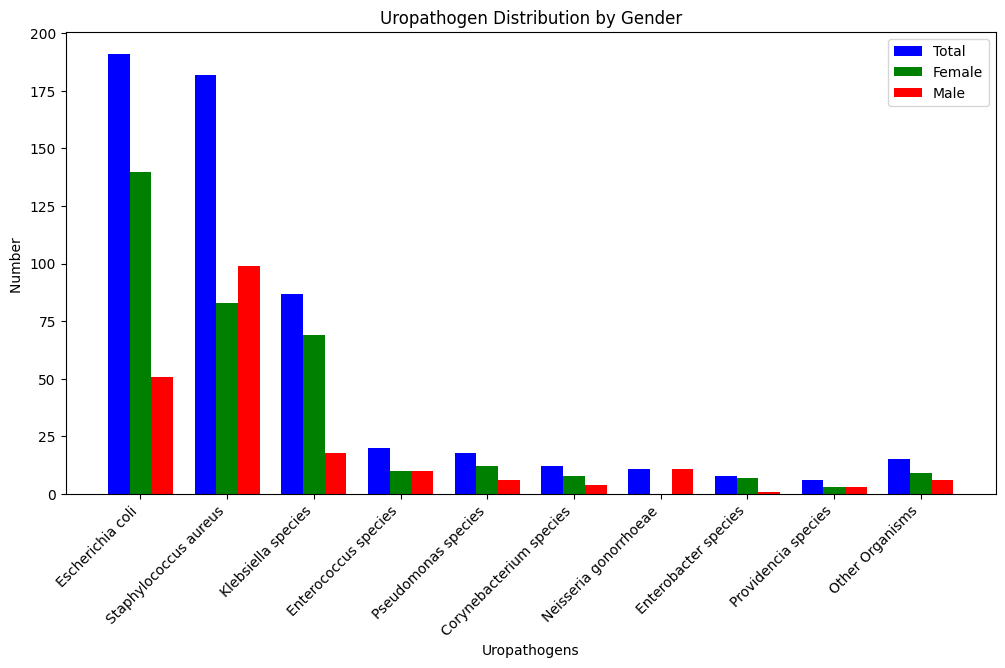

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 15 organisms
#top_10_organisms = organism_counts.sort_values(by=['Total'], ascending=False)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Set bar width
bar_width = 0.25

# Set positions for bars
r1 = np.arange(len(top_10_organisms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
ax.bar(r1, top_10_organisms['Total'], color='b', width=bar_width, label='Total')
ax.bar(r2, top_10_organisms['Female'], color='g', width=bar_width, label='Female')
ax.bar(r3, top_10_organisms['Male'], color='r', width=bar_width, label='Male')

# Add labels, title, and legend
ax.set_xlabel('Uropathogens')
ax.set_ylabel('Number ')
ax.set_title('Uropathogen Distribution by Gender')
ax.set_xticks([r + bar_width for r in range(len(top_10_organisms))])
ax.set_xticklabels(top_10_organisms.index, rotation=45, ha='right')
ax.legend()

# Display the graph
plt.show()


In [153]:
# Define age bins and labels
bins = [0, 15, 26, 36, 46, 66, float('inf')]  # Define bin edges
labels = ['0-14', '15-25', '26-35', '36-45', '46-65', '>65']  # Define labels

# Assign Age Group to the DataFrame
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)


In [154]:
# prompt: code to calculate organism_counts_by_age_group


organism_counts_by_age_group = filtered_data.groupby(['Organism', 'Age Group'])['Organism'].count().unstack(fill_value=0)
organism_counts_by_age_group

<ipython-input-154-7cc43206067b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organism_counts_by_age_group = filtered_data.groupby(['Organism', 'Age Group'])['Organism'].count().unstack(fill_value=0)


Age Group,0-14,15-25,26-35,36-45,46-65,>65
Organism,,,,,,
Corynebacterium species,0,3,0,5,4,0
Enterobacter species,1,0,2,2,2,1
Enterococcus species,0,2,5,6,5,2
Escherichia coli,13,34,31,38,41,34
Klebsiella species,8,15,24,17,18,5
Neisseria gonorrhoeae,0,3,1,5,2,0
Other Organisms,1,3,6,2,2,1
Providencia species,0,0,1,0,4,1
Pseudomonas species,1,4,4,3,3,3


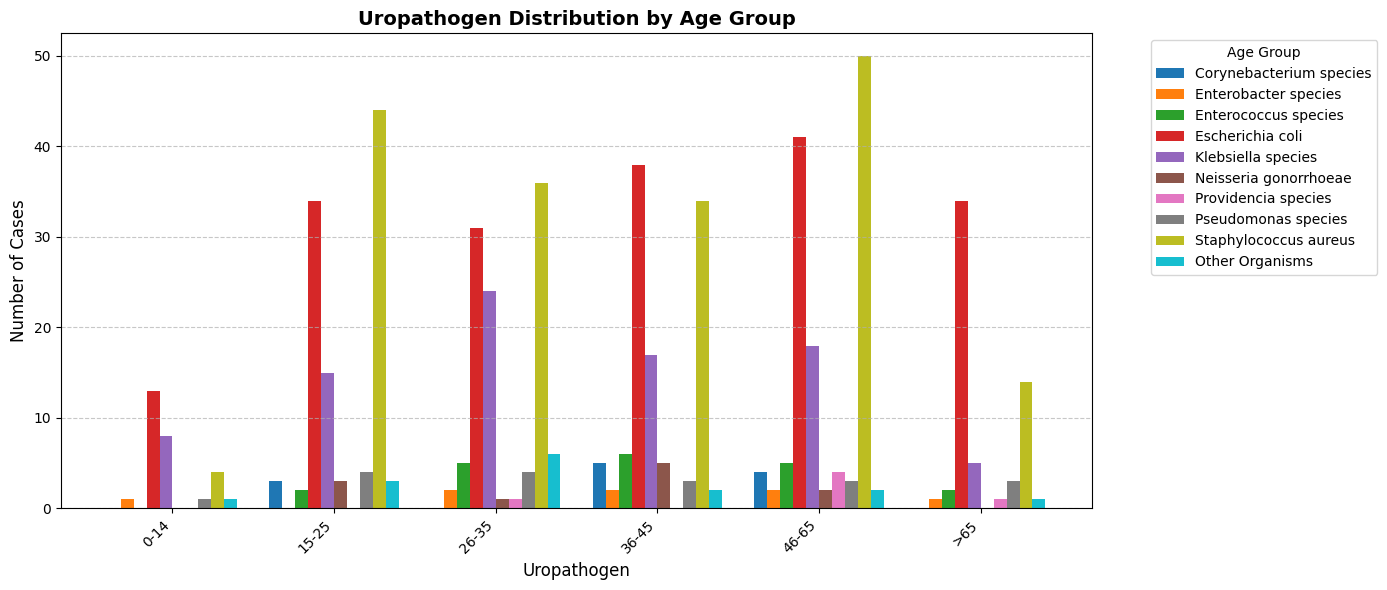

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure "Other Organisms" is last
if "Other Organisms" in organism_counts_by_age_group.index:
    # Move "Other Organisms" to the end
    organism_counts_by_age_group = organism_counts_by_age_group.loc[
        [org for org in organism_counts_by_age_group.index if org != "Other Organisms"] + ["Other Organisms"]
    ]

# Transpose the DataFrame for plotting
organism_counts_by_age_group = organism_counts_by_age_group.T

# Set bar width dynamically based on the number of organisms (age groups) to prevent overlap
num_organisms = len(organism_counts_by_age_group.index)
num_age_groups = len(organism_counts_by_age_group.columns)
bar_width = 0.8 / num_age_groups  # Adjust width to prevent overlap between bars

# Get the positions of the bars on the x-axis (spacing the bars evenly)
x_pos = np.arange(len(organism_counts_by_age_group.index))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))  # Increase figure size for better visibility

for i, age_group in enumerate(organism_counts_by_age_group.columns):
    ax.bar(x_pos + i * bar_width, organism_counts_by_age_group[age_group], width=bar_width, label=age_group)

# Customize the chart
ax.set_xlabel('Uropathogen', fontsize=12)
ax.set_ylabel('Number of Cases', fontsize=12)
ax.set_title('Uropathogen Distribution by Age Group', fontsize=14, fontweight='bold')

# Adjust X-axis labels to prevent overlapping
ax.set_xticks(x_pos + bar_width * (num_age_groups / 2) - bar_width / 2)  # Adjusting for proper centering
ax.set_xticklabels(organism_counts_by_age_group.index, rotation=45, ha='right')

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a legend with a title
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()


In [156]:
import pandas as pd

# ... (your previous code to load, process, and encode urine_data) ...

# Select columns containing antibiotic data (encoded columns)
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]  # Corrected line

# Create a dictionary to store the counts
antibiotic_counts = {}

# Iterate through antibiotic columns and count I, R, S
for column in antibiotic_columns:
    antibiotic_name = column[:-2]  # Extract antibiotic name from column name

    # Get the category (I, R, or S) from the column name
    category = column[-1]

    # Store the count in the dictionary, creating a new entry for the antibiotic if needed
    if antibiotic_name not in antibiotic_counts:
        antibiotic_counts[antibiotic_name] = {'I': 0, 'R': 0, 'S': 0}  # Initialize counts to 0

    antibiotic_counts[antibiotic_name][category] = urine_data[column].sum()
# Convert the dictionary to a DataFrame for better display
antibiotic_counts_df = pd.DataFrame(antibiotic_counts).T
antibiotic_counts_df.index.name = 'Antibiotic'
# Display the results
print(antibiotic_counts_df)

print(len(urine_data))

                              I    R    S
Antibiotic                               
Amoxicillin                   1   17   39
Amoxicillin/Clavulanic Acid   7  178  138
Ampicillin                    2  249   32
Azlocillin                    0    1    1
Aztreonam                     1   11    7
Cefaclor                      0    4    4
Cefazolin                     5   76  232
Ceftriaxone                   3   65  116
Chloramphenicol               5   76  232
Chlortetracycline             1    2   27
Ciprofloxacin                 9  103  135
Clindamycin                   3  266  124
Erythromycin                  7  123   41
Gentamicin                    1   77  253
Imipenem                      2    5  350
Meropenem                     1    4   58
Moxifloxacin                  1    3    2
Nitrofurantoin               11   37  262
Ofloxacin                     0    2    1
Penicillin                    2  121   50
Sulfamethoxazole              4  316   54
550


In [159]:
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
for col in encoded_columns:
       urine_data[col] = urine_data[col].astype(int)  # Convert to integers if necessary
       urine_data[col] = urine_data[col].clip(0, 1)  # Clip values to be between 0 and 1

In [ ]:
#Let us remove the antibiotics that have only zeros for I, R and S from our encoded columns


In [165]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
from IPython.display import display  # Explicitly import display


import pandas as pd

# ... (your previous code to load, process, and encode urine_data) ...

# Select columns containing antibiotic data (encoded columns)
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]

# Create a dictionary to store the counts
antibiotic_counts = {}

# Iterate through antibiotic columns and count I, R, S
for column in antibiotic_columns:
    antibiotic_name = column[:-2]  # Extract antibiotic name from column name

    # Initialize counts for the antibiotic if not already present
    if antibiotic_name not in antibiotic_counts:
        antibiotic_counts[antibiotic_name] = {'Resistant': 0, 'Sensitive': 0, 'Total Culture': 0}

    # Get the category (I, R, or S) from the column name
    category = column[-1]

    # Update counts based on category
    if category in ('I', 'S'):
        antibiotic_counts[antibiotic_name]['Sensitive'] += filtered_data[column].sum()

    elif category == 'R':
        antibiotic_counts[antibiotic_name]['Resistant'] += filtered_data[column].sum()


    # Update Total Culture count
    antibiotic_counts[antibiotic_name]['Total Culture'] = antibiotic_counts[antibiotic_name]['Resistant'] + antibiotic_counts[antibiotic_name]['Sensitive']

# Dynamically generate antimicrobial_agents list from antibiotic_counts keys
antimicrobial_agents = list(antibiotic_counts.keys())

# Create a dictionary to store the table data
table_data = {'Antimicrobial\nAgents': antimicrobial_agents,
              'No. of Cultures Tested': [],
              'Resistant No (%)': [],
              'Sensitive No (%)': []}

# Iterate through antimicrobial agents and populate the table data
for agent in antimicrobial_agents:
    total_culture = antibiotic_counts[agent]['Total Culture']
    resistant = antibiotic_counts[agent]['Resistant']
    sensitive = antibiotic_counts[agent]['Sensitive']

    table_data['No. of Cultures Tested'].append(total_culture)
    table_data['Resistant No (%)'].append(f"{resistant} ({resistant / total_culture * 100:.1f}%)" if total_culture else '0 (0.0%)')
    table_data['Sensitive No (%)'].append(f"{sensitive} ({sensitive / total_culture * 100:.1f}%)" if total_culture else '0 (0.0%)')

# Create the DataFrame
susceptibility_table = pd.DataFrame(table_data)
#sort ascending
susceptibility_table = pd.DataFrame(table_data)
# Sort ascending (same as before)
susceptibility_table = susceptibility_table.sort_values(by='Antimicrobial\nAgents', ascending=True)

# Display using DataTable
display(data_table.DataTable(susceptibility_table)) # Correction here

,Antimicrobial\nAgents,No. of Cultures Tested,Resistant No (%),Sensitive No (%)
0,Amoxicillin,57,17 (29.8%),40 (70.2%)
1,Amoxicillin/Clavulanic Acid,323,178 (55.1%),145 (44.9%)
2,Ampicillin,283,249 (88.0%),34 (12.0%)
3,Azlocillin,2,1 (50.0%),1 (50.0%)
4,Aztreonam,19,11 (57.9%),8 (42.1%)
5,Cefaclor,8,4 (50.0%),4 (50.0%)
6,Cefazolin,313,76 (24.3%),237 (75.7%)
7,Ceftriaxone,184,65 (35.3%),119 (64.7%)
8,Chloramphenicol,313,76 (24.3%),237 (75.7%)
9,Chlortetracycline,30,2 (6.7%),28 (93.3%)


In [166]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = filtered_data['Organism'].unique()
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data (organisms as rows, antibiotics as columns)
table_data = {}

# Loop through organisms and antimicrobial agents to populate the table
for organism in unique_organisms:
    for agent in antimicrobial_agents:
        # Create keys for 'T' and 'RNo (%)' for each organism-antibiotic pair
        total_key = organism + ' T_' + agent  # Unique key for Total
        rno_key = organism + ' RNo (%)_' + agent  # Unique key for RNo (%)

        try:
            # Calculate total tested and resistant count
            total_tested = filtered_data.loc[filtered_data['Organism'] == organism, [agent + '_I', agent + '_R', agent + '_S']].sum().sum()
            #resistant_count = filtered_data.loc[filtered_data['Organism'] == organism, [agent + '_I', agent + '_R']].sum().sum()
            resistant_count = filtered_data.loc[filtered_data['Organism'] == organism, [agent + '_R']].sum().sum()

            # Store values in the table_data dictionary
            table_data[total_key] = total_tested
            table_data[rno_key] = f"{resistant_count} ({resistant_count / total_tested * 100:.1f})" if total_tested else 'ND'

        except KeyError:
            # Handle cases where the agent is not found for the current organism
            table_data[total_key] = 'ND'
            table_data[rno_key] = 'ND'

# Create the DataFrame
susceptibility_table = pd.DataFrame([table_data]).T.rename(columns={0: 'Value'})

# Split the index values safely with conditional checks
susceptibility_table['Organism'] = susceptibility_table.index.map(lambda x: x.split(' T_')[0] if ' T_' in x else x.split(' RNo (%)_')[0])
susceptibility_table['Type'] = susceptibility_table.index.map(lambda x: 'T' if ' T_' in x else 'RNo (%)')
susceptibility_table['Antibiotic'] = susceptibility_table.index.map(lambda x: x.split(' T_')[1] if ' T_' in x else x.split(' RNo (%)_')[1])

# Reshape the DataFrame to have organisms as rows
susceptibility_table = susceptibility_table.set_index(['Organism', 'Type', 'Antibiotic'])['Value'].unstack('Antibiotic')
#remove all antibiotics that have only ND values throughout
susceptibility_table = susceptibility_table.loc[:, (susceptibility_table != 'ND').any(axis=0)]
#sort ascending
susceptibility_table = susceptibility_table.sort_values(by='Organism', ascending=True)

# Display the table using data_table formatter
display(susceptibility_table)

Antibiotic                      Amoxicillin Amoxicillin/Clavulanic Acid  \
Organism                Type                                              
Corynebacterium species RNo (%)          ND                    5 (62.5)   
                        T                 0                           8   
Enterobacter species    RNo (%)          ND                    3 (75.0)   
                        T                 0                           4   
Enterococcus species    RNo (%)     0 (0.0)                    3 (27.3)   
                        T                 2                          11   
Escherichia coli        RNo (%)    7 (38.9)                   74 (65.5)   
                        T                18                         113   
Klebsiella species      T                15                          44   
                        RNo (%)    4 (26.7)                   34 (77.3)   
Neisseria gonorrhoeae   RNo (%)          ND                    1 (16.7)   
                        T                 0                           6   
Other Organisms         RNo (%)     0 (0.0)                    6 (54.5)   
                        T                 1                          11   
Providencia species     RNo (%)          ND                    4 (80.0)   
                        T                 0                           5   
Pseudomonas species     RNo (%)   2 (100.0)                    3 (60.0)   
                        T                 2                           5   
Staphylococcus aureus   RNo (%)    4 (21.1)                   45 (38.8)   
                        T                19                         116   

Antibiotic                       Ampicillin  Aztreonam   Cefaclor  Cefazolin  \
Organism                Type                                                   
Corynebacterium species RNo (%)  10 (100.0)    0 (0.0)         ND   1 (14.3)   
                        T                10          2          0          7   
Enterobacter species    RNo (%)    5 (83.3)         ND         ND   2 (40.0)   
                        T                 6          0          0          5   
Enterococcus species    RNo (%)    2 (25.0)         ND         ND   2 (33.3)   
                        T                 8          0          0          6   
Escherichia coli        RNo (%)  132 (89.8)   2 (50.0)   2 (50.0)  13 (12.9)   
                        T               147          4          4        101   
Klebsiella species      T                67          4          2         45   
                        RNo (%)   65 (97.0)  4 (100.0)   1 (50.0)  15 (33.3)   
Neisseria gonorrhoeae   RNo (%)   1 (100.0)         ND         ND   1 (33.3)   
                        T                 1          0          0          3   
Other Organisms         RNo (%)    7 (87.5)  1 (100.0)         ND   3 (23.1)   
                        T                 8          1          0         13   
Providencia species     RNo (%)    3 (75.0)         ND         ND    0 (0.0)   
                        T                 4          0          0          5   
Pseudomonas species     RNo (%)   11 (84.6)    0 (0.0)    0 (0.0)   2 (18.2)   
                        T                13          2          1         11   
Staphylococcus aureus   RNo (%)   13 (68.4)   4 (66.7)  1 (100.0)  37 (31.6)   
                        T                19          6          1        117   

Antibiotic                      Ceftriaxone Chloramphenicol Chlortetracycline  \
Organism                Type                                                    
Corynebacterium species RNo (%)    3 (75.0)        1 (14.3)                ND   
                        T                 4               7                 0   
Enterobacter species    RNo (%)     0 (0.0)        2 (40.0)                ND   
                        T                 1               5                 0   
Enterococcus species    RNo (%)     0 (0.0)        2 (33.3)           0 (0.0)   
                     

In [167]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [168]:
#export the dataframe to csv
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)


OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive'

In [66]:
#display all antibi otic columns
print("Antibiotic Columns:")
for column in antibiotic_columns:
    print(column)

Antibiotic Columns:
Amoxicillin_I
Amoxicillin_R
Amoxicillin_S
Amoxicillin/Clavulanic Acid_I
Amoxicillin/Clavulanic Acid_R
Amoxicillin/Clavulanic Acid_S
Ampicillin_I
Ampicillin_R
Ampicillin_S
Azlocillin_R
Azlocillin_S
Aztreonam_I
Aztreonam_R
Aztreonam_S
Cefaclor_I
Cefaclor_R
Cefaclor_S
Cefazolin_I
Cefazolin_R
Cefazolin_S
Ceftriaxone_I
Ceftriaxone_R
Ceftriaxone_S
Chloramphenicol_I
Chloramphenicol_R
Chloramphenicol_S
Chlortetracycline_I
Chlortetracycline_R
Chlortetracycline_S
Ciprofloxacin_I
Ciprofloxacin_R
Ciprofloxacin_S
Clindamycin_I
Clindamycin_R
Clindamycin_S
Erythromycin_I
Erythromycin_R
Erythromycin_S
Gentamicin_I
Gentamicin_R
Gentamicin_S
Imipenem_I
Imipenem_R
Imipenem_S
Meropenem_I
Meropenem_R
Meropenem_S
Moxifloxacin_I
Moxifloxacin_R
Moxifloxacin_S
Nitrofurantoin_I
Nitrofurantoin_R
Nitrofurantoin_S
Ofloxacin_R
Ofloxacin_S
Penicillin_I
Penicillin_R
Penicillin_S
Sulfamethoxazole_I
Sulfamethoxazole_R
Sulfamethoxazole_S


In [171]:
import pandas as pd

# Define antibiotic classes and their corresponding antibiotics
antibiotic_classes = {
    'Beta-lactams': ['Amoxicillin', 'Amoxicillin/Clavulanic Acid', 'Ampicillin', 'Azlocillin', 'Aztreonam',
                      'Cefaclor', 'Cefazolin', 'Ceftriaxone', 'Penicillin'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Ofloxacin', 'Moxifloxacin'],
    'Aminoglycosides': ['Gentamicin'],
    'Macrolides': ['Clindamycin', 'Erythromycin'],
    'Tetracyclines': ['Chlortetracycline'],
    'Sulfonamides': ['Sulfamethoxazole'],
    'Carbapenems': ['Imipenem', 'Meropenem'],
    'Others': ['Chloramphenicol', 'Nitrofurantoin']
}

# Initialize a list to store resistant classes for each isolate
resistant_classes_list = []

# Iterate over each row (isolate) in the dataset
for index, row in filtered_data.iterrows():
    resistant_classes = []  # Stores resistant classes for current isolate

    # Check for resistance in each antibiotic class
    for class_name, antibiotics in antibiotic_classes.items():
        for antibiotic in antibiotics:
            antibiotic_resistant_col = f"{antibiotic}_R"  # Column name for resistance

            # Check if the column exists and if the isolate is resistant (value = 1)
            if antibiotic_resistant_col in row and row[antibiotic_resistant_col] == 1:
                resistant_classes.append(class_name)  # Add class to the list
                break  # No need to check other antibiotics in this class

    # Convert list to comma-separated string for easier readability
    resistant_classes_str = ', '.join(resistant_classes)

    # Append the resistant classes for this isolate
    resistant_classes_list.append(resistant_classes_str)

# Add the new column to the dataset
filtered_data['Resistant Classes'] = resistant_classes_list

# Display updated dataset with the new column
import IPython.display as display
display.display(filtered_data[['Identification number', 'Specimen number', 'Organism', 'Resistant Classes']])


,Identification number,Specimen number,Organism,Resistant Classes
209,O-1835,NaN,Escherichia coli,"Beta-lactams, Macrolides, Sulfonamides, Others"
236,O-1809,NaN,Staphylococcus aureus,"Beta-lactams, Macrolides, Sulfonamides, Others"
244,O-1798,NaN,Klebsiella species,"Beta-lactams, Sulfonamides, Others"
261,O-1782,NaN,Staphylococcus aureus,"Beta-lactams, Macrolides, Sulfonamides, Others"
276,O-1780,NaN,Staphylococcus aureus,"Beta-lactams, Macrolides, Sulfonamides, Others"
...,...,...,...,...
4417,O-0051,NaN,Escherichia coli,"Beta-lactams, Macrolides, Sulfonamides"
4427,O-0029,NaN,Escherichia coli,"Beta-lactams, Macrolides, Carbapenems"
4436,O-0035,NaN,Escherichia coli,Beta-lactams
4438,O-0037,NaN,Klebsiella species,"Beta-lactams, Macrolides, Sulfonamides"


In [172]:
# Function to determine MDR status
def classify_mdr(resistant_classes):
    if isinstance(resistant_classes, str):  # Ensure it's a string before splitting
        num_classes = len(resistant_classes.split(', '))
        return 'MDR' if num_classes >= 3 else 'Non-MDR'
    return 'Non-MDR'  # Default to Non-MDR if no resistance

# Apply MDR classification
filtered_data['MDR Status'] = filtered_data['Resistant Classes'].apply(classify_mdr)

# Display MDR statistics
mdr_counts = filtered_data['MDR Status'].value_counts()
print(mdr_counts)

# Display MDR isolates only
mdr_isolates = filtered_data[filtered_data['MDR Status'] == 'MDR']
import IPython.display as display
display.display(mdr_isolates[['Identification number', 'Specimen number', 'Organism', 'Resistant Classes', 'MDR Status']])


MDR Status
MDR        281
Non-MDR    269
Name: count, dtype: int64


,Identification number,Specimen number,Organism,Resistant Classes,MDR Status
209,O-1835,NaN,Escherichia coli,"Beta-lactams, Macrolides, Sulfonamides, Others",MDR
236,O-1809,NaN,Staphylococcus aureus,"Beta-lactams, Macrolides, Sulfonamides, Others",MDR
244,O-1798,NaN,Klebsiella species,"Beta-lactams, Sulfonamides, Others",MDR
261,O-1782,NaN,Staphylococcus aureus,"Beta-lactams, Macrolides, Sulfonamides, Others",MDR
276,O-1780,NaN,Staphylococcus aureus,"Beta-lactams, Macrolides, Sulfonamides, Others",MDR
...,...,...,...,...,...
4362,0-0063,NaN,Klebsiella species,"Beta-lactams, Macrolides, Others",MDR
4408,O-0061,NaN,Klebsiella species,"Beta-lactams, Macrolides, Sulfonamides, Others",MDR
4417,O-0051,NaN,Escherichia coli,"Beta-lactams, Macrolides, Sulfonamides",MDR
4427,O-0029,NaN,Escherichia coli,"Beta-lactams, Macrolides, Carbapenems",MDR


In [191]:
import pandas as pd

# Create a table showing the MDR vs. Non-MDR distribution for each organism in the filtered_data DataFrame.
mdr_distribution_table = filtered_data.groupby(['Organism', 'MDR Status'])['MDR Status'].count().unstack(fill_value=0)

# Rename columns for clarity
mdr_distribution_table = mdr_distribution_table.rename(columns={'MDR': 'MDR Count', 'Non-MDR': 'Non-MDR Count'})

# Add a total column
mdr_distribution_table['Total'] = mdr_distribution_table['MDR Count'] + mdr_distribution_table['Non-MDR Count']

# Calculate percentages
mdr_distribution_table['MDR Percentage'] = (mdr_distribution_table['MDR Count'] / mdr_distribution_table['Total']) * 100
mdr_distribution_table['Non-MDR Percentage'] = (mdr_distribution_table['Non-MDR Count'] / mdr_distribution_table['Total']) * 100

# Format percentage columns to one decimal place
mdr_distribution_table['MDR Percentage'] = mdr_distribution_table['MDR Percentage'].map('{:.1f}'.format)
mdr_distribution_table['Non-MDR Percentage'] = mdr_distribution_table['Non-MDR Percentage'].map('{:.1f}'.format)


In [192]:
import pandas as pd

# ... (your previous code to create mdr_distribution_table) ...

# Create new columns for formatted output
mdr_distribution_table['MDR (n, %)'] = mdr_distribution_table.apply(
    lambda row: f"{row['MDR Count']} ({row['MDR Percentage']})", axis=1
)
mdr_distribution_table['Non-MDR (n, %)'] = mdr_distribution_table.apply(
    lambda row: f"{row['Non-MDR Count']} ({row['Non-MDR Percentage']})", axis=1
)

# Select and reorder columns for display
mdr_distribution_table = mdr_distribution_table[['MDR (n, %)','Non-MDR (n, %)','Total']]

# Display the reformatted table
display(mdr_distribution_table)

MDR Status,"MDR (n, %)","Non-MDR (n, %)",Total
Organism,,,
Corynebacterium species,8 (66.7),4 (33.3),12
Enterobacter species,5 (62.5),3 (37.5),8
Enterococcus species,7 (35.0),13 (65.0),20
Escherichia coli,101 (52.9),90 (47.1),191
Klebsiella species,52 (59.8),35 (40.2),87
Neisseria gonorrhoeae,1 (9.1),10 (90.9),11
Other Organisms,8 (53.3),7 (46.7),15
Providencia species,2 (33.3),4 (66.7),6
Pseudomonas species,9 (50.0),9 (50.0),18


<ipython-input-175-32bee723ce22>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resistant_classes_df.index, y=resistant_classes_df['Count'], palette='Reds_r')


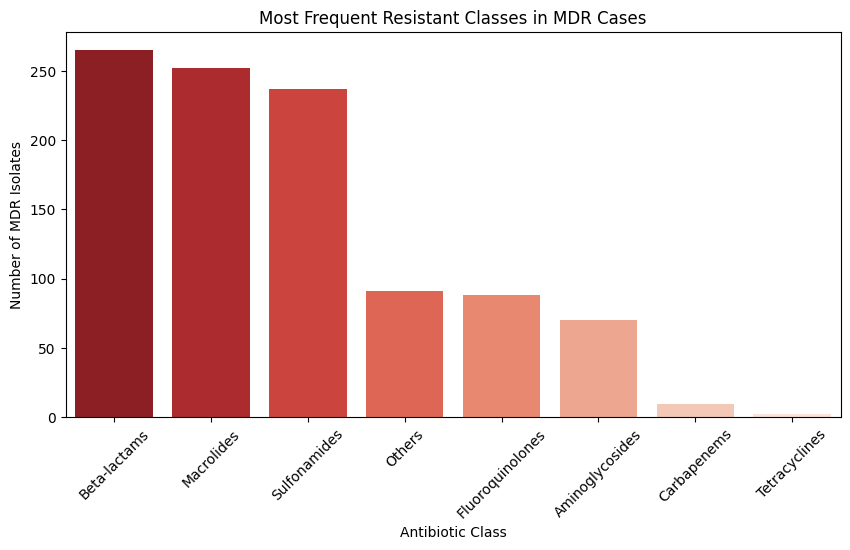

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define antibiotic classes
antibiotic_classes = ['Beta-lactams', 'Fluoroquinolones', 'Aminoglycosides',
                      'Macrolides', 'Tetracyclines', 'Sulfonamides', 'Carbapenems', 'Others']

# Count occurrences of each antibiotic class in MDR cases
resistant_classes_counts = {cls: 0 for cls in antibiotic_classes}

# Loop through MDR data and count occurrences of each resistance class
for classes in mdr_isolates['Resistant Classes'].dropna():
    for cls in classes.split(", "):  # Split multi-class resistance
        if cls in resistant_classes_counts:
            resistant_classes_counts[cls] += 1

# Convert to DataFrame for visualization
resistant_classes_df = pd.DataFrame.from_dict(resistant_classes_counts, orient='index', columns=['Count'])
resistant_classes_df = resistant_classes_df.sort_values(by='Count', ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=resistant_classes_df.index, y=resistant_classes_df['Count'], palette='Reds_r')
plt.xlabel("Antibiotic Class")
plt.ylabel("Number of MDR Isolates")
plt.title("Most Frequent Resistant Classes in MDR Cases")
plt.xticks(rotation=45)
plt.show()


                         Beta-lactams  Fluoroquinolones  Aminoglycosides  \
Escherichia coli            27.586207         10.632184         6.609195   
Staphylococcus aureus       25.000000          8.950617         7.098765   
Klebsiella species          25.641026          7.179487         6.153846   
Enterococcus species        29.166667         12.500000        12.500000   
Pseudomonas species         23.529412          2.941176         8.823529   
Other Organisms             24.242424          9.090909         9.090909   
Corynebacterium species     29.629630          3.703704         3.703704   
Enterobacter species        21.052632          0.000000        10.526316   
Providencia species         28.571429          0.000000         0.000000   
Neisseria gonorrhoeae       33.333333          0.000000         0.000000   

                         Macrolides  Tetracyclines  Sulfonamides  Carbapenems  \
Escherichia coli          25.574713       0.287356     23.563218     0.287356   
S

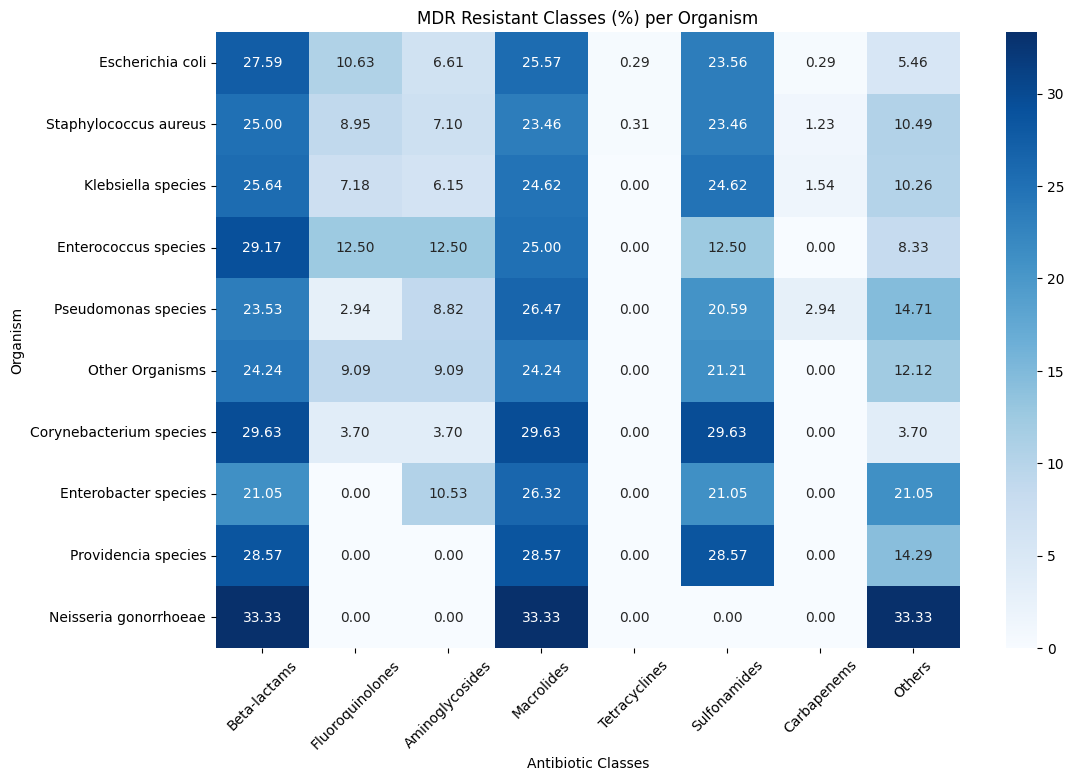

In [186]:
# Filter MDR organisms only
mdr_data_filtered = mdr_isolates[mdr_isolates['MDR Status'] == 'MDR']

# Initialize a dictionary to hold class counts per organism
organism_class_counts = {}

# Loop through each organism and its corresponding resistant classes
for _, row in mdr_data_filtered.iterrows():
    organism = row['Organism']
    classes = row['Resistant Classes'].split(", ")  # Split multi-class resistance

    # Initialize organism in dictionary if not already present
    if organism not in organism_class_counts:
        organism_class_counts[organism] = {cls: 0 for cls in antibiotic_classes}

    # Count the classes for the current organism
    for cls in classes:
        if cls in organism_class_counts[organism]:
            organism_class_counts[organism][cls] += 1

# Convert to DataFrame for better visualization
organism_class_df = pd.DataFrame.from_dict(organism_class_counts, orient='index')

# Calculate the percentage for each resistance class in each organism
organism_class_percentage = organism_class_df.div(organism_class_df.sum(axis=1), axis=0) * 100
#print organism_class_percentage
#print(organism_class_percentage)

# Plot the results as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(organism_class_percentage, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.xlabel("Antibiotic Classes")
plt.ylabel("Organism")
plt.title("MDR Resistant Classes (%) per Organism")
plt.xticks(rotation=45)
plt.show()


In [178]:
import pandas as pd

# Assuming 'filtered_data' is your DataFrame

# Get the columns related to resistance (ending with _I, _R, _S)
resistance_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]

# Group by organism and sum the resistance columns
organism_resistance_counts = filtered_data.groupby('Organism')[resistance_columns].sum()

# Separate R, I, and S columns
R_columns = [col for col in resistance_columns if col.endswith('_R')]
I_columns = [col for col in resistance_columns if col.endswith('_I')]
S_columns = [col for col in resistance_columns if col.endswith('_S')]

# Calculate total R, I, and S for each organism
organism_resistance_counts['Total_R'] = organism_resistance_counts[R_columns].sum(axis=1)
organism_resistance_counts['Total_I'] = organism_resistance_counts[I_columns].sum(axis=1)
organism_resistance_counts['Total_S'] = organism_resistance_counts[S_columns].sum(axis=1)

# Display the results
print(organism_resistance_counts[['Total_R', 'Total_I', 'Total_S']])

                         Total_R  Total_I  Total_S
Organism                                          
Corynebacterium species       40        1       47
Enterobacter species          27        1       23
Enterococcus species          51        3       77
Escherichia coli             584       15      722
Klebsiella species           321        9      289
Neisseria gonorrhoeae         16        0       36
Other Organisms               55        3       65
Providencia species           19        0       26
Pseudomonas species           56        4       67
Staphylococcus aureus        567       30      806


In [182]:
import pandas as pd
from IPython.display import display  # Import display function
from google.colab import data_table

data_table.enable_dataframe_formatter()
data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = filtered_data['Organism'].unique()
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data
table_data = {'Bacterial Isolates': [], 'R0 No (%)': [], 'R1 No (%)': [], 'R2 No (%)': [],
              'R3 No (%)': [], 'R4 No (%)': [], 'R5 No (%)': [], 'R6 No (%)': [], '>R7 No (%)': []}

# Iterate through unique organisms
for organism in unique_organisms:
    # Get organism count, handling potential KeyError
    organism_count = filtered_data['Organism'].value_counts().get(organism, 0)

    table_data['Bacterial Isolates'].append(f"{organism} ({organism_count})")

    # Calculate resistance counts for each category directly
    resistance_counts = [0] * 8  # Initialize counts for R0 to >R7

    for i in range(len(resistance_counts)):
        # Calculate count for current resistance level (R0 to >R7)
        count = 0
        for _, row in urine_data[urine_data['Organism'] == organism].iterrows():
            resistance_level = 0
            for agent in antimicrobial_agents:
                if agent + '_I' in row and agent + '_R' in row:
                    if row[agent + '_I'] == 1 or row[agent + '_R'] == 1:
                        resistance_level += 1

            if resistance_level == i:  # Check if resistance level matches current category
                count += 1
            elif resistance_level > 6 and i == 7: # For >R7 category
                count += 1

        resistance_counts[i] = count

    # Calculate percentages and format for the table
    total_isolates = filtered_data['Organism'].value_counts().get(organism, 0)  # Handle KeyError
    for i in range(len(resistance_counts)):
        percentage = (resistance_counts[i] / total_isolates) * 100 if total_isolates else 0
        table_data[f"R{i} No (%)" if i <= 6 else ">R7 No (%)"].append(f"{resistance_counts[i]} ({percentage:.1f}%)")

# Create the DataFrame
multi_drug_resistance_table = pd.DataFrame(table_data)

# Display the table using data_table formatter
display(multi_drug_resistance_table)

,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),>R7 No (%)
0,Escherichia coli (191),3 (1.6%),23 (12.0%),42 (22.0%),50 (26.2%),45 (23.6%),18 (9.4%),4 (2.1%),6 (3.1%)
1,Staphylococcus aureus (182),9 (4.9%),25 (13.7%),36 (19.8%),37 (20.3%),31 (17.0%),20 (11.0%),11 (6.0%),13 (7.1%)
2,Klebsiella species (87),3 (3.4%),1 (1.1%),20 (23.0%),22 (25.3%),18 (20.7%),8 (9.2%),8 (9.2%),7 (8.0%)
3,Enterococcus species (20),0 (0.0%),4 (20.0%),5 (25.0%),5 (25.0%),5 (25.0%),1 (5.0%),0 (0.0%),0 (0.0%)
4,Other Organisms (15),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%)
5,Pseudomonas species (18),2 (11.1%),2 (11.1%),2 (11.1%),4 (22.2%),3 (16.7%),2 (11.1%),1 (5.6%),2 (11.1%)
6,Corynebacterium species (12),0 (0.0%),1 (8.3%),2 (16.7%),4 (33.3%),3 (25.0%),1 (8.3%),0 (0.0%),1 (8.3%)
7,Enterobacter species (8),0 (0.0%),1 (12.5%),2 (25.0%),1 (12.5%),1 (12.5%),2 (25.0%),1 (12.5%),0 (0.0%)
8,Neisseria gonorrhoeae (11),4 (36.4%),2 (18.2%),4 (36.4%),0 (0.0%),0 (0.0%),0 (0.0%),1 (9.1%),0 (0.0%)
9,Providencia species (6),0 (0.0%),0 (0.0%),1 (16.7%),4 (66.7%),0 (0.0%),1 (16.7%),0 (0.0%),0 (0.0%)


In [122]:
from datetime import date
print(filtered_data['Specimen date'])



209    2021-12-31
236    2021-12-20
244    2021-12-17
261    2021-12-15
276    2021-12-14
          ...    
4417   2020-01-13
4427   2020-01-09
4436   2020-01-09
4438   2020-01-09
4454   2020-01-06
Name: Specimen date, Length: 550, dtype: datetime64[ns]


In [123]:
# Ensure 'Specimen date' column is in datetime format
filtered_data['Specimen date'] = pd.to_datetime(filtered_data['Specimen date'], errors='coerce')

# Now, extract the year from the 'Specimen date' column
filtered_data['Year'] = filtered_data['Specimen date'].dt.year

# Check the first few rows to ensure the conversion worked
print(filtered_data[['Specimen date', 'Year']].head())


    Specimen date  Year
209 2021-12-31     2021
236 2021-12-20     2021
244 2021-12-17     2021
261 2021-12-15     2021
276 2021-12-14     2021


In [121]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from google.colab import data_table

# Enable DataFrame formatter for Google Colab (optional)
data_table.enable_dataframe_formatter()

# Assuming `urine_data` is preloaded with the appropriate data.

# 1. Ensure 'Specimen date' is in datetime format and extract the year
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')
urine_data['Year'] = urine_data['Specimen date'].dt.year

# 2. Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# 3. Initialize a dictionary to store results for antibiotic resistance analysis
results = {}

# 4. Iterate through organisms, antibiotics, and years to calculate resistance patterns
for organism in unique_organisms:
    results[organism] = {}

    for agent in antimicrobial_agents:
        results[organism][agent] = {'years': [], 'resistance_percentages': [], 'resistance_counts': [], 'total_counts': []}

        for year in urine_data['Year'].unique():
            year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

            # Calculate individual antibiotic resistance counts for R, I, and S
            resistant_count = year_data[f'{agent}_R'].sum() if f'{agent}_R' in year_data else 0
            intermediate_count = year_data[f'{agent}_I'].sum() if f'{agent}_I' in year_data else 0
            susceptible_count = year_data[f'{agent}_S'].sum() if f'{agent}_S' in year_data else 0
            total_count = year_data.shape[0]  # Total isolates for this organism in this year

            # Calculate resistance proportion: (R+I) / (R+I+S) * 100
            resistance_percentage = (resistant_count + intermediate_count) / (resistant_count + intermediate_count + susceptible_count) * 100 if total_count > 0 else 0

            results[organism][agent]['years'].append(year)
            results[organism][agent]['resistance_percentages'].append(resistance_percentage)
            results[organism][agent]['resistance_counts'].append((resistant_count, intermediate_count))
            results[organism][agent]['total_counts'].append(total_count)

# 5. Perform Chi-square test and store p-values
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        if len(data['years']) > 1:  # Check if data exists for more than one year
            # Create contingency table (adjusting for zero values)
            contingency_table = [
                [data['resistance_counts'][i][0] + data['resistance_counts'][i][1],
                 total - (data['resistance_counts'][i][0] + data['resistance_counts'][i][1])]  # (R + I, S)
                for i, total in enumerate(data['total_counts'])
            ]
            contingency_table = [[max(val, 0.5) for val in row] for row in contingency_table]

            # Perform Chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            results[organism][agent]['p_value'] = p_value

# 6. Create and display the result table (filtering for significant p-values)
resistance_result_table_data = []
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        p_value = data.get('p_value', None)  # Get p-value, or None if not calculated
        if p_value is not None and p_value < 0.05:  # Check for significance
            resistance_result_table_data.append({
                'Organism': organism,
                'Antibiotic': agent,
                'P-value': f'{p_value:.5f}',
                'Resistance Percentage (2021)': f'{data["resistance_percentages"][-1]:.2f}',  # Last year's value (2021)
                'Resistance Percentage (2020)': f'{data["resistance_percentages"][0]:.2f}',  # First year's value (2020)
            })

resistance_result_table = pd.DataFrame(resistance_result_table_data)
display(resistance_result_table)


<ipython-input-121-8cb4bb270733>:40: RuntimeWarning: invalid value encountered in scalar divide
  resistance_percentage = (resistant_count + intermediate_count) / (resistant_count + intermediate_count + susceptible_count) * 100 if total_count > 0 else 0


,Organism,Antibiotic,P-value,Resistance Percentage (2021),Resistance Percentage (2020)
0,Escherichia coli,Amoxicillin/Clavulanic Acid,0.00004,71.43,63.16
1,Escherichia coli,Sulfamethoxazole,0.04572,80.36,87.84
2,Escherichia coli,Clindamycin,0.01774,96.36,89.66
3,Escherichia coli,Gentamicin,0.03331,26.00,12.99
4,Staphylococcus aureus,Gentamicin,0.00061,37.50,11.32
5,Klebsiella species,Amoxicillin/Clavulanic Acid,0.00224,77.78,76.47
6,Klebsiella species,Cefazolin,0.00156,44.44,16.67
7,Klebsiella species,Clindamycin,0.02767,96.77,72.73
8,Klebsiella species,Chloramphenicol,0.00156,44.44,16.67
9,Klebsiella species,Gentamicin,0.02137,37.04,20.00


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#export the dataframe to csv
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)
#export multiple drug resistance table
multi_drug_resistance_table.to_csv('/content/drive/My Drive/multi_drug_resistance_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/multi_drug_resistance_table.csv')
#export susceptibility_table
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)


In [ ]:
#let us do a time series analysis


In [ ]:
#display all columns
print("Antibiotic Columns:")
for column in antibiotic_columns:
    print(column)

Antibiotic Columns:
Amoxicillin_I
Amoxicillin_R
Amoxicillin_S
Amoxicillin/Clavulanic Acid_I
Amoxicillin/Clavulanic Acid_R
Amoxicillin/Clavulanic Acid_S
Ampicillin_I
Ampicillin_R
Ampicillin_S
Azlocillin_R
Azlocillin_S
Aztreonam_I
Aztreonam_R
Aztreonam_S
Cefaclor_I
Cefaclor_R
Cefaclor_S
Cefazolin_I
Cefazolin_R
Cefazolin_S
Ceftriaxone_I
Ceftriaxone_R
Ceftriaxone_S
Chloramphenicol_I
Chloramphenicol_R
Chloramphenicol_S
Chlortetracycline_I
Chlortetracycline_R
Chlortetracycline_S
Ciprofloxacin_I
Ciprofloxacin_R
Ciprofloxacin_S
Clindamycin_I
Clindamycin_R
Clindamycin_S
Erythromycin_I
Erythromycin_R
Erythromycin_S
Gentamicin_I
Gentamicin_R
Gentamicin_S
Imipenem_I
Imipenem_R
Imipenem_S
Meropenem_I
Meropenem_R
Meropenem_S
Moxifloxacin_I
Moxifloxacin_R
Moxifloxacin_S
Nitrofurantoin_I
Nitrofurantoin_R
Nitrofurantoin_S
Ofloxacin_R
Ofloxacin_S
Penicillin_I
Penicillin_R
Penicillin_S
Sulfamethoxazole_I
Sulfamethoxazole_R
Sulfamethoxazole_S
